## Use this to compare test images with their predicted labels

In [67]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from PIL import Image

In [70]:
# File read
main_path = r"C:\Users\judd_gallares\W207\group_project"
train_path = os.path.join(main_path,"train_scene_classification")
model_path = os.path.join(main_path,"scene_class_models")

# test images
test_img_path = os.path.join(main_path,"test_images")                      # get image file path
df_test_labels = pd.read_csv(main_path+r"\predicted_test_labels_cnn2d.csv")  # read test image labels csv

# training images
train_img_path = os.path.join(train_path,"train")
df_train_labels = pd.read_csv(train_path+r"\train.csv")

# train only images
train_img_only = os.path.join(main_path,"train_images_only")

# test images- grayscale
gray_test_img = os.path.join(main_path,"gray_test_images")

# Assign names to label_ids: 0 - 5
# The labels have been rearranged from their order in kaggle to how they correspond to images in train.csv 
label_name = ['buildings','forests','glacier','mountains','sea','street']

test_img_count = len(os.listdir(test_img_path))
test_lbl_count = len(df_test_labels)
gray_test_img_count = len(os.listdir(gray_test_img))
train_img_count = len(os.listdir(train_img_path))
train_lbl_count = len(df_train_labels)
train_img_only_count = len(os.listdir(train_img_only))

print("test_img_count: ",test_img_count)
print("test_lbl_count: ",test_lbl_count)
print("gray_test_img: ",gray_test_img_count)
print("train_img_count: ",train_img_count)
print("train_lbl_count: ",train_lbl_count)
print("train_lbl_only: ",train_img_only_count)

test_img_count:  7288
test_lbl_count:  7288
gray_test_img:  7288
train_img_count:  24335
train_lbl_count:  17034
train_lbl_only:  17034


In [94]:

# CREATE A TRAIN_ONLY IMAGE FOLDER

# for img_name in df_train_labels.image_name:
#     f = os.path.join(train_img_path, img_name)

#     m = Image.open(f)
#     plt.imshow(m)
#     break
#     m.save(os.path.join(train_img_only,img_name))


# CREATE A GRAYSCALE OF TEST IMAGES

gray = []

for i in range(test_img_count):
    name=r"test_"+str(i)+".jpg"

    img = load_img(os.path.join(test_img_path,name))
    
    gr = tf.image.rgb_to_grayscale(img)
    
    gray.append(gr)
    
    # Uncomment to save to file
    # m = array_to_img(gr)
    # m.save(os.path.join(gray_test_img,name))


### Vary STARTING_TEST_IMAGE_ID_NO below to go through other samples

In [123]:
STARTING_TEST_IMAGE_ID_NO = 0 # must be between 0 to 7288 -  NO_OF_SAMPLED_IMAGES (r*8)


r = 5 # no. of image grid rows

def plot_sample_images(img,label):
    """Accepts lists of images and labels 
       then plots them in grid format"""
    
    c = 8 # no. of image grid columns (fixed)
    
    fig, ax = plt.subplots(r, c, figsize=(18*r,9*c))    
    #fig.set_size_inches(18, 9)
    
    for i in range(r):
        for j in range(c):
            k = j + (c * i)
                
            ax[i, j].imshow(img[k])
            ax[i, j].axis('off')
            ax[i, j].set_title(label[k], fontsize=15*r)
        
    plt.show()

def display_sample_images(n_rows=8,data=1,lbl_arr=None,path=test_img_path):
    img_list = []
    lbl_list = []
    
    j = STARTING_TEST_IMAGE_ID_NO
    k = STARTING_TEST_IMAGE_ID_NO+(r*8)
    
    for i in range(j,k):
        if data == 1:
            lbl = df_test_labels.iat[i,0]
            name = r"test_"+str(i)+".jpg"
        elif data == 2:
            lbl = label_name[df_train_labels.label.iloc[i]]
            name = df_train_labels.image_name.iloc[i]
        elif data == 3:
            lbl = lbl_arr[i]
            name = r"test_"+str(i)+".jpg"
            
        lbl_list.append(lbl)
        img = load_img(os.path.join(path, name))
        img_list.append(img)

    plot_sample_images(img_list,lbl_list)

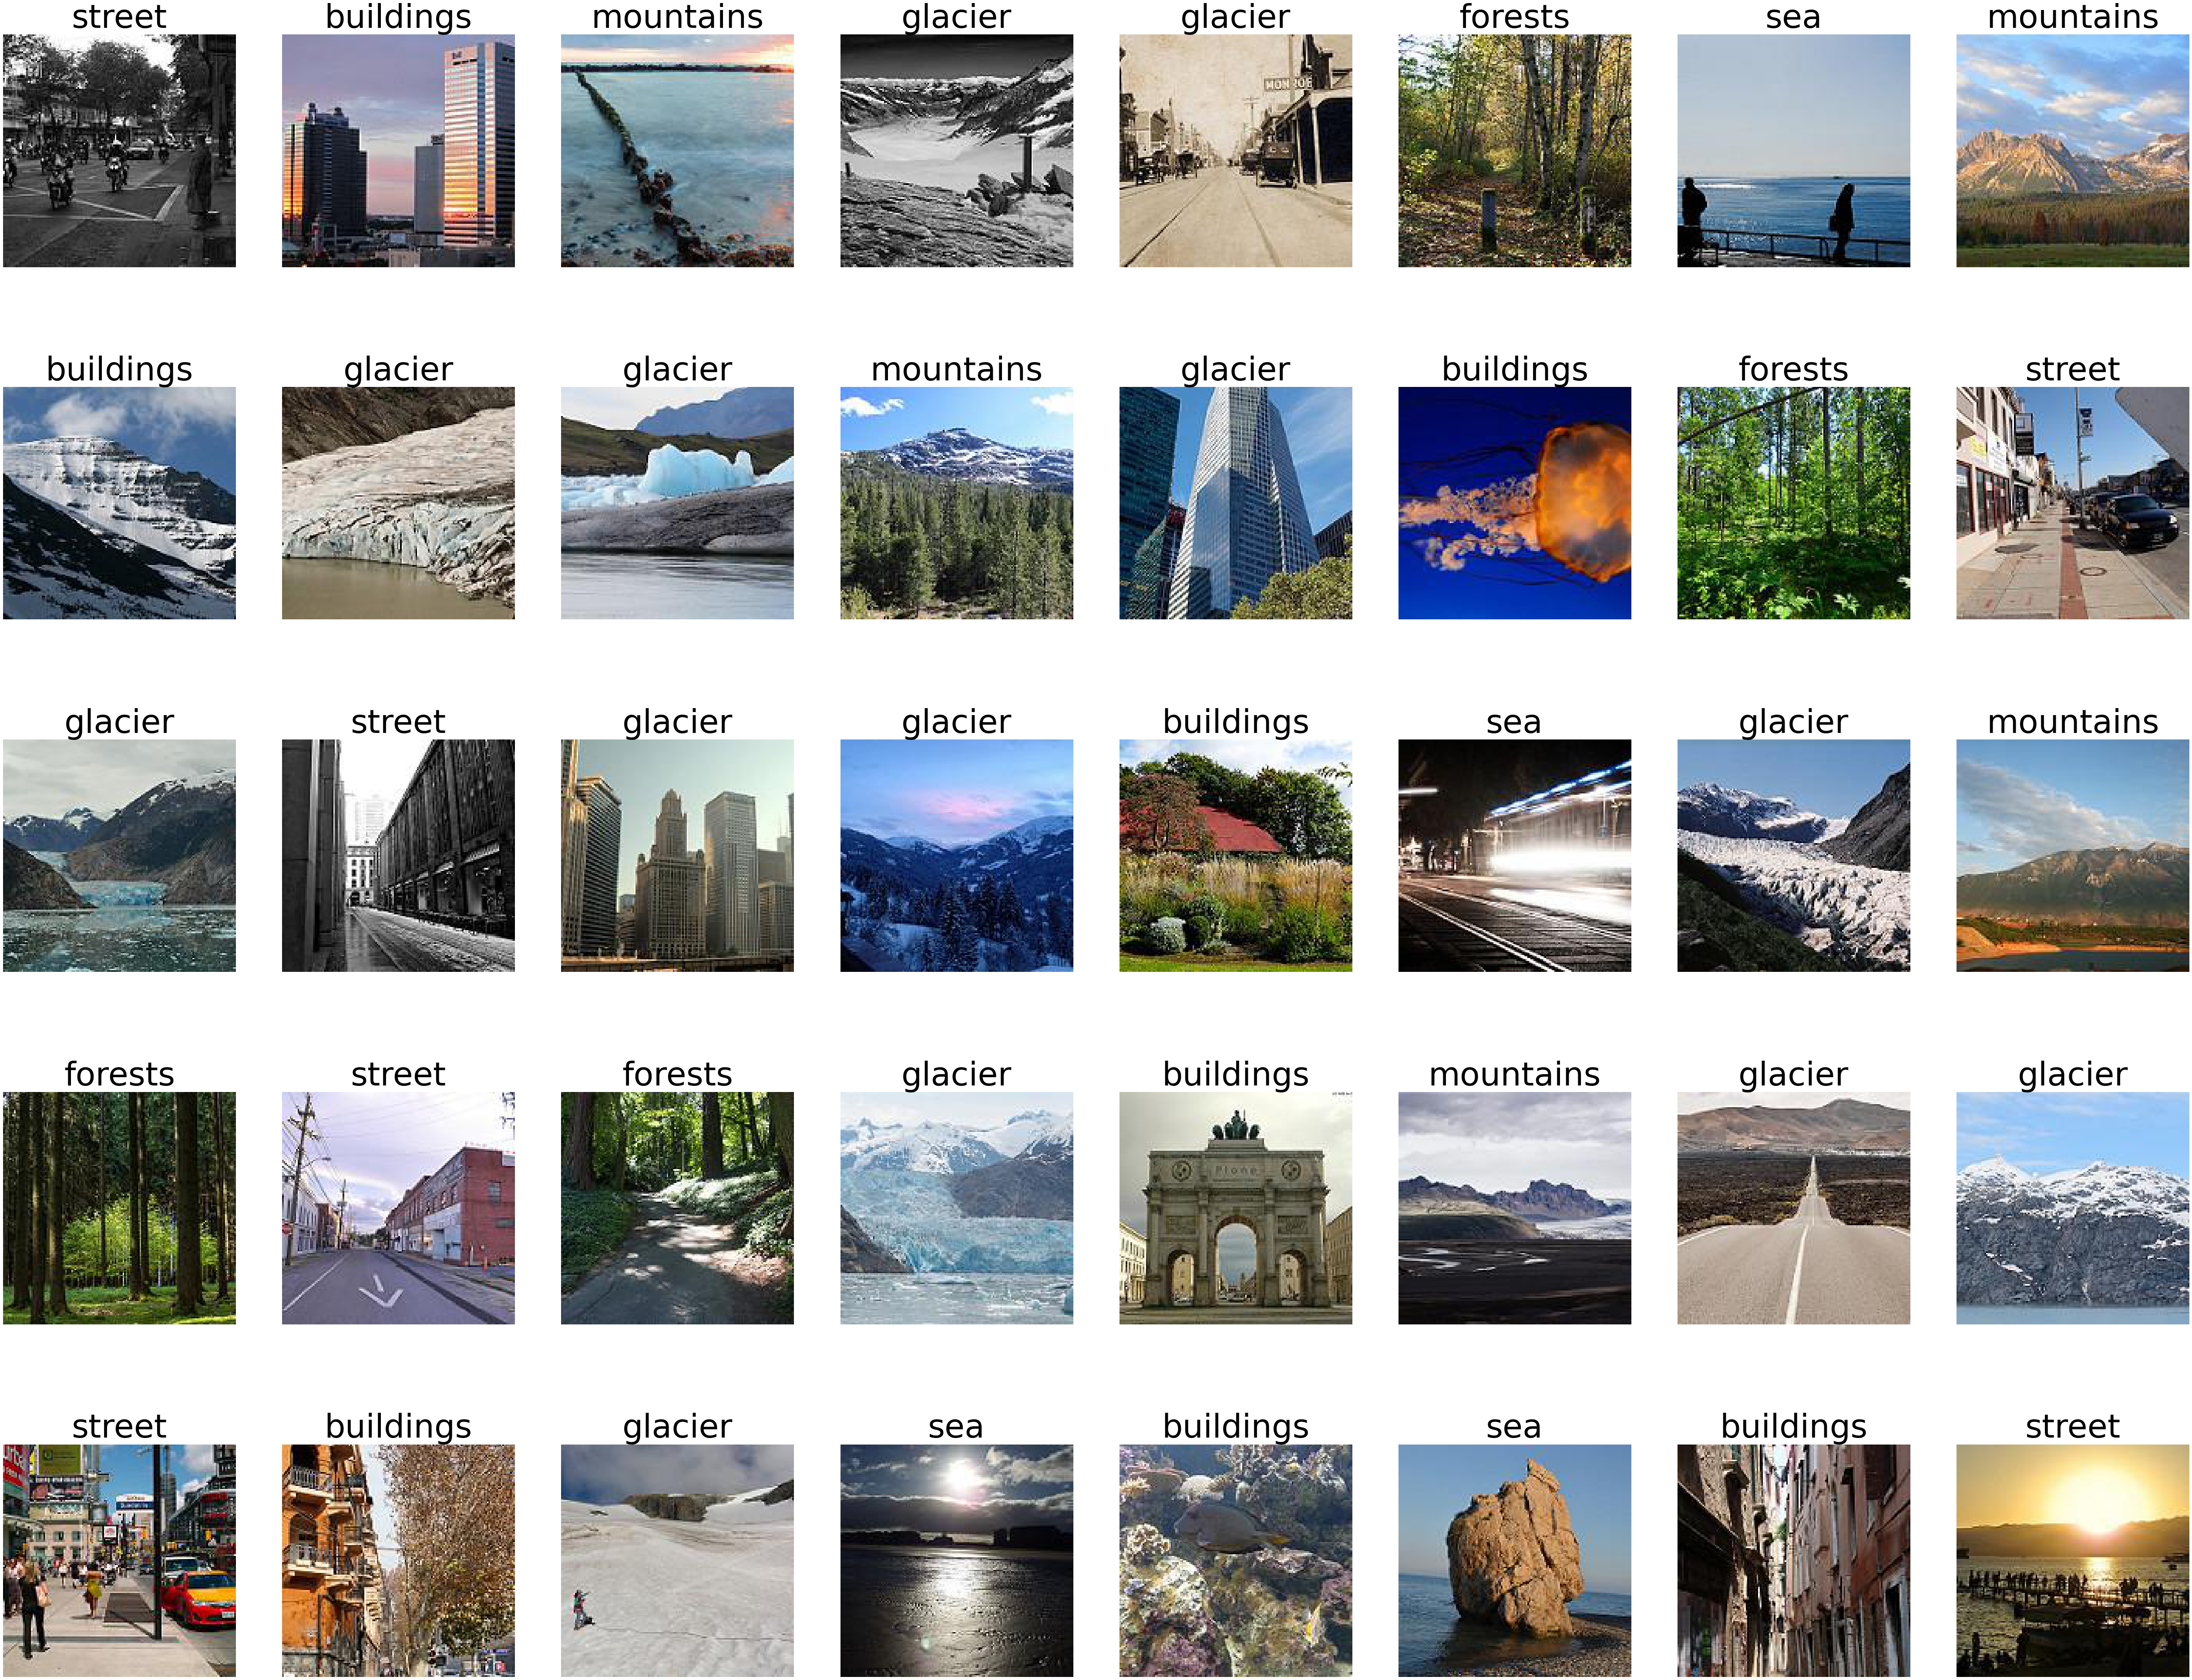

In [29]:
display_sample_images()

In [127]:
model_cnn1d = models.load_model(model_path+"\cnn1d_model.h5")

print("Check model_cnn1d load:")
model_cnn1d.summary()

gray = np.array(gray)

y = model_cnn1d.predict(gray)
y_pred_cnn1d = [np.argmax(i) for i in y]

gray_labels = [label_name[pred] for pred in y_pred_cnn1d]

print("CNN_1D Sample")
gray_labels[:5]

Check model_cnn1d load:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv1D)             (None, 150, 256)          38656     
                                                                 
 pool_1 (MaxPooling1D)       (None, 75, 256)           0         
                                                                 
 flatten (Flatten)           (None, 19200)             0         
                                                                 
 fc_1 (Dense)                (None, 6)                 115206    
                                                                 
Total params: 153,862
Trainable params: 153,862
Non-trainable params: 0
_________________________________________________________________
228/228 [==============================] - 1s 4ms/step
CNN_1D Sample


['street', 'glacier', 'buildings', 'buildings', 'street']

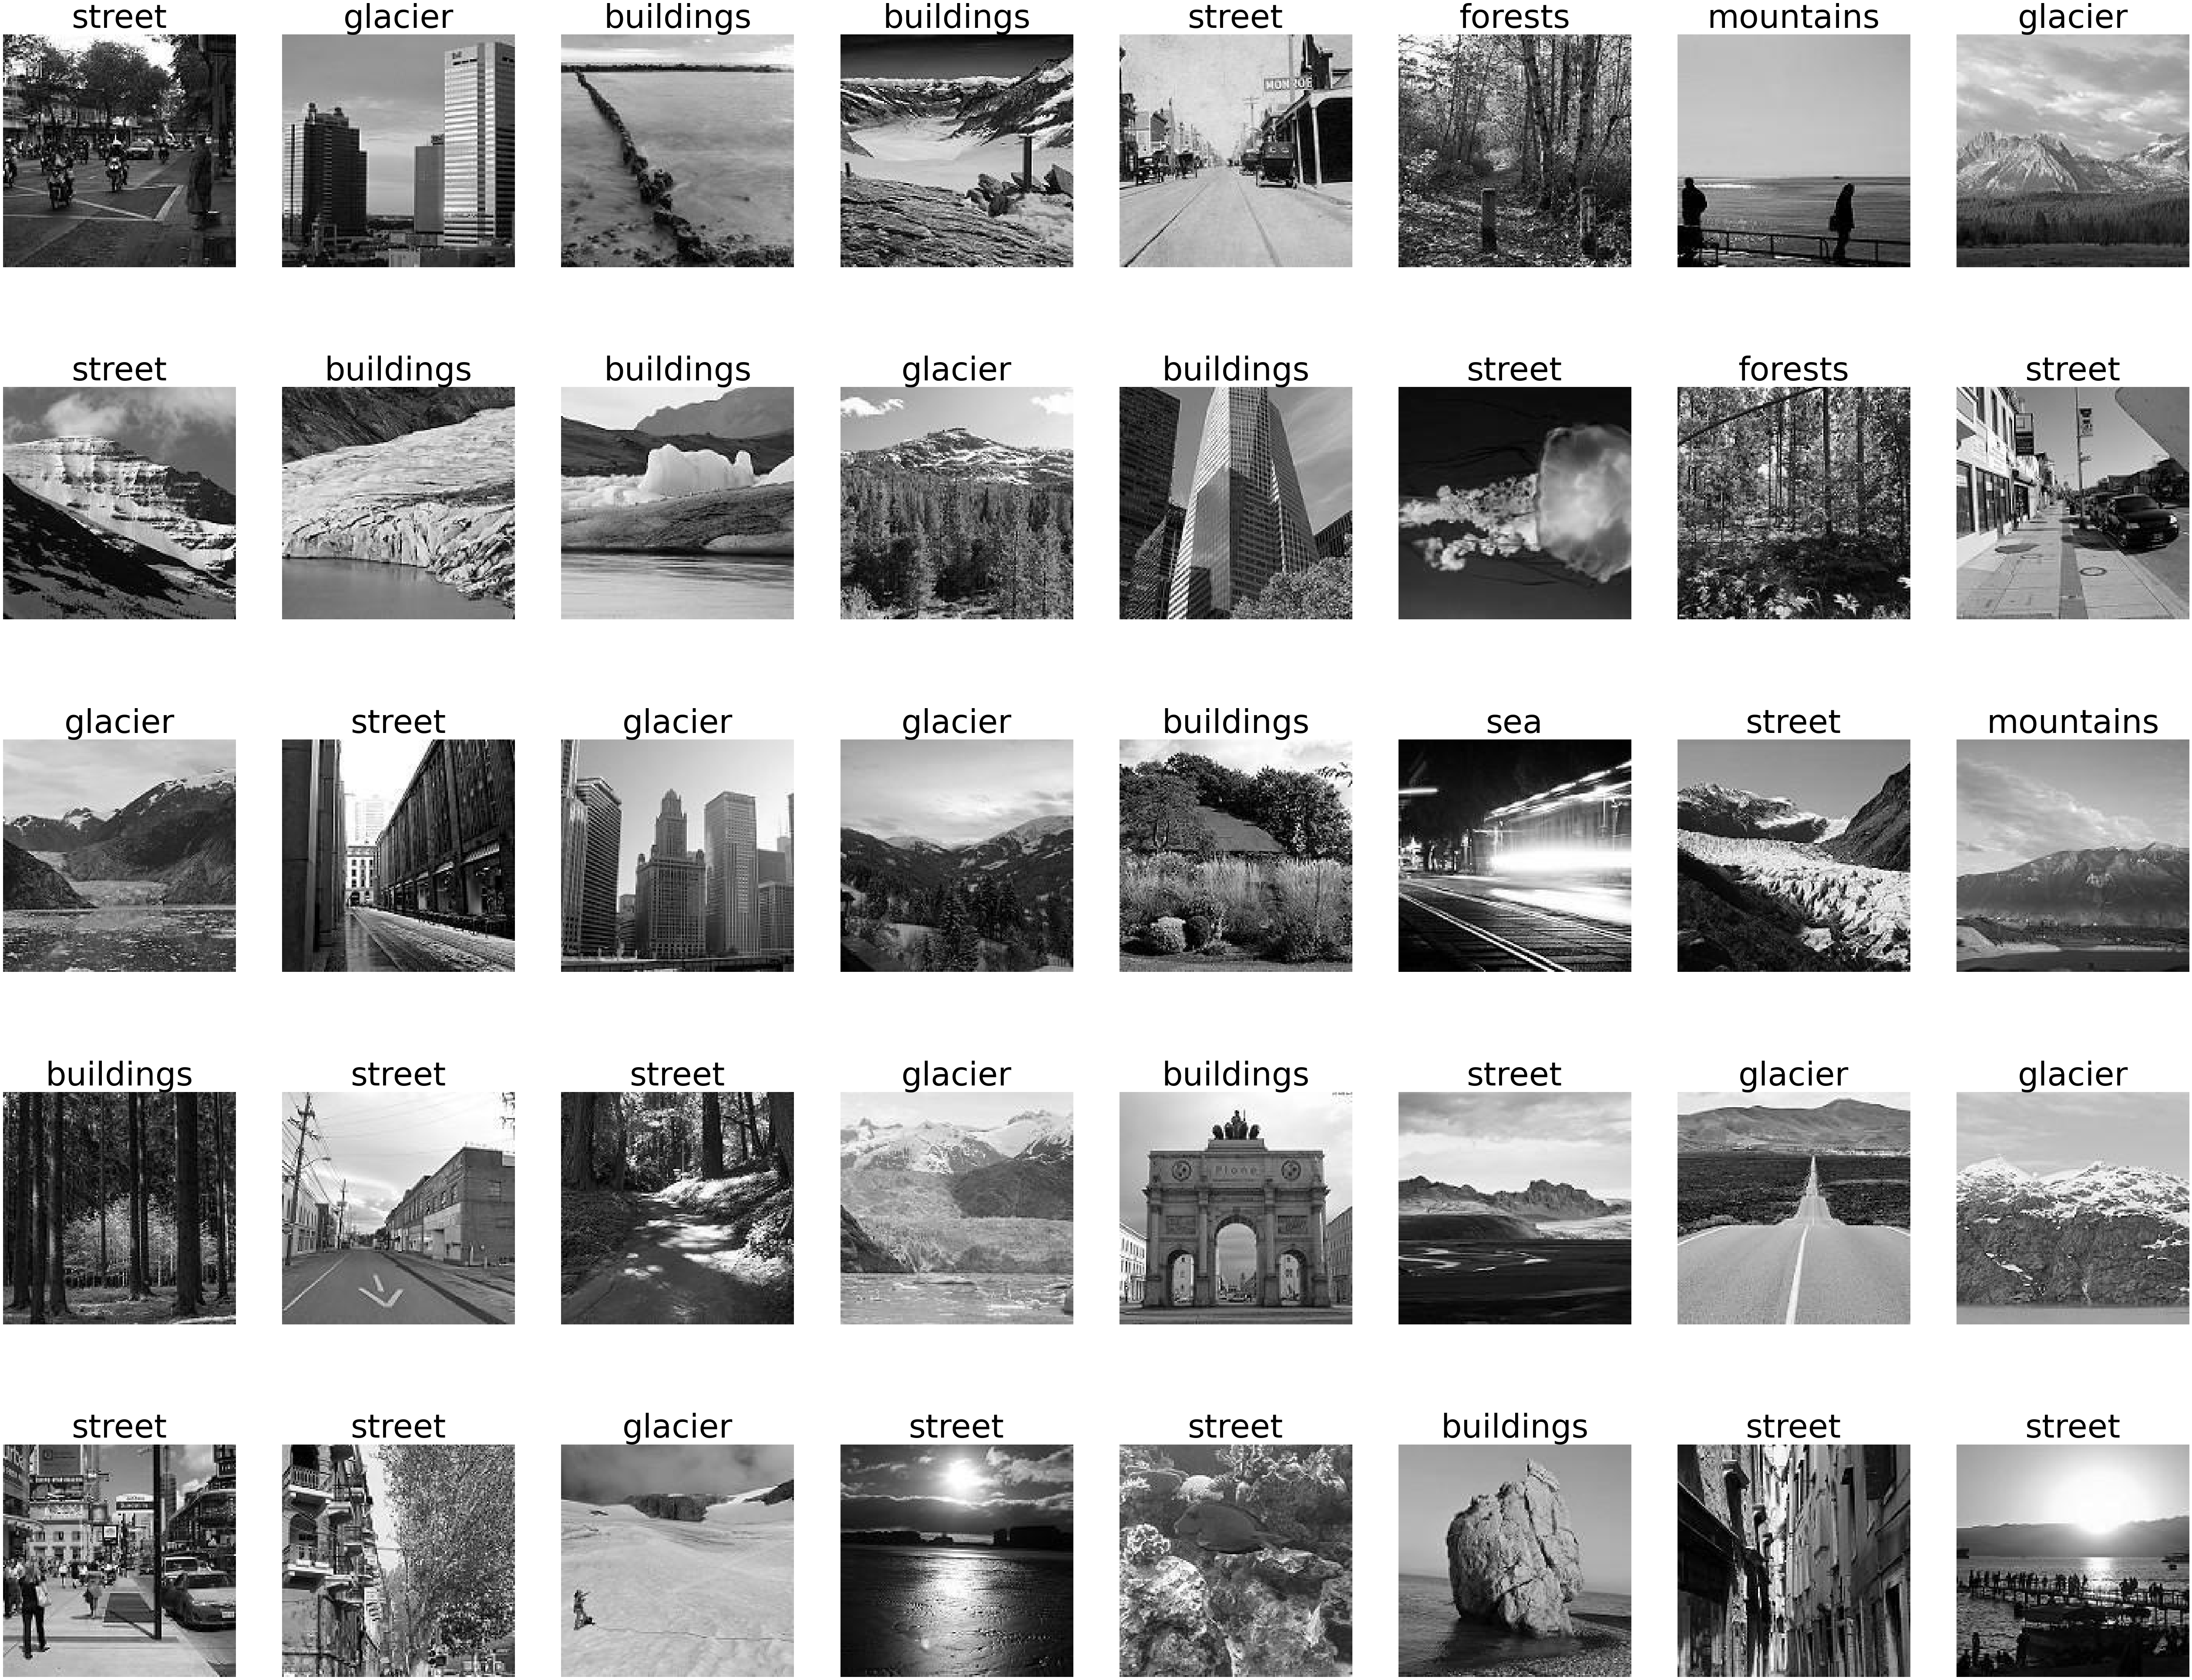

In [129]:
# CNN_1D model.predict vs unlabeled test data
display_sample_images(n_rows=5,data=3,lbl_arr=gray_labels,path=gray_test_img)

In [ ]:
# train_only_images vs. their labels
display_sample_images(n_rows=8,data=1,lbl_arr=None,path=test_img_path)